In [1]:

import matplotlib.pyplot as plt
import numpy as np
import pairinteraction as pi  # use `import pairinteraction.real as pi` for better performance
from pairinteraction.visualization.colormaps import alphamagma

if pi.Database.get_global_database() is None:
    
    pi.Database.initialize_global_database(download_missing=True)

In [19]:
ns = np.arange(60,80,2)

Rb_c6s = []
Cs_c6s = []

V_Rb = []
V_Cs = []

# basis = pi.BasisAtom("Rb", n=(57, 83), l=(0,1))
# system = pi.SystemAtom(basis)
# pair_basis = pi.BasisPair([system,system])
# pair_system = pi.SystemPair(pair_basis)
# pair_system.diagonalize()
for n in ns:
    ket1 = pi.KetAtom("Rb", n, l=1, j=0.5, m=0.5)
    ket2 = pi.KetAtom("Cs", n, l=1, j=0.5, m=0.5)

    pi.BasisAtom('Rb', n=(60,70), l=(0,1), j=(0.5,1.5))
    c6_obj = pi.C6(ket1, ket1)
    # pi.EffectiveSystemPair = pair_system
    c6_obj.set_distance_vector([0, 0, 7], unit = 'micrometers')
    c6_obj.set_diamagnetism_enabled(False)
    c6_obj.set_magnetic_field([0, 0, 6.65], "gauss")
    c6_obj.check_for_resonances(required_overlap=0.9)
    c6_obj.set_interaction_order(4)
    c6 = c6_obj.get("MHz um^6")
    Rb_c6s.append(c6)
    V_Rb.append(c6/(117649))
    # print(c6_obj.system_pair)

    # c6_obj = pi.C6(ket2, ket2)
    # c6_obj.set_distance_vector([0, 0, 7], unit = 'micrometers')
    # c6_obj.set_diamagnetism_enabled(True)
    # c6_obj.set_magnetic_field([0, 0, 6.65], "gauss")
    # c6_obj.check_for_resonances(required_overlap=0.9) 
    # c6 = c6_obj.get("MHz um^6")
    # Cs_c6s.append(c6)
    # V_Cs.append(c6/(117649))

c:\Users\Tommy\OneDrive - Durham University\level 4 Project\L4 code directory\.venv\Lib\site-packages\scipy\sparse\_compressed.py:332: RuntimeWarning: invalid value encountered in multiply
  data = np.multiply(ret.data, other[ret.coords])
Detected 'inf' entries in the effective eigenvectors.
 This might happen, if you forgot to include a degenerate state in the model space.
 Consider adding the following states to the model space:
  - |~Rb:62,G_9/2,5/2; ~Rb:57,H_9/2,5/2⟩ has infinite admixture
  - |~Rb:62,G_9/2,3/2; ~Rb:57,H_9/2,7/2⟩ has infinite admixture
  - |~Rb:62,G_7/2,5/2; ~Rb:57,H_11/2,5/2⟩ has infinite admixture
  - |~Rb:62,G_9/2,1/2; ~Rb:57,H_9/2,9/2⟩ has infinite admixture
  - |~Rb:62,G_7/2,3/2; ~Rb:57,H_11/2,7/2⟩ has infinite admixture
  - |~Rb:62,G_7/2,1/2; ~Rb:57,H_11/2,9/2⟩ has infinite admixture
Detected 'inf' entries in the effective eigenvectors.
 This might happen, if you forgot to include a degenerate state in the model space.
 Consider adding the following states to

c:\Users\Tommy\OneDrive - Durham University\level 4 Project\L4 code directory\.venv\Lib\site-packages\matplotlib\cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Tommy\OneDrive - Durham University\level 4 Project\L4 code directory\.venv\Lib\site-packages\matplotlib\cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


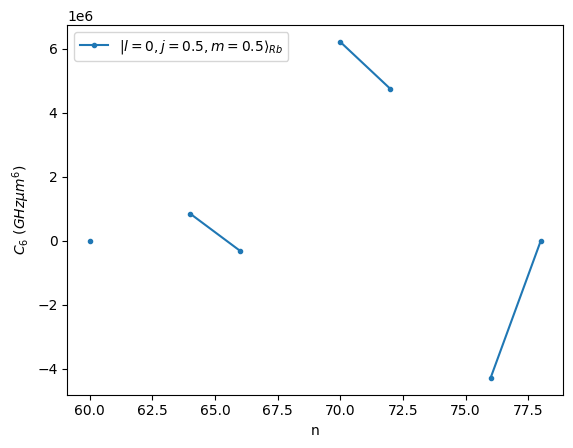

In [18]:
plt.figure()
# plt.plot(ns,Cs_c6s, label = r'$|l=0, j=0.5, m=0.5 \rangle_{Cs} $', marker='.')
plt.plot(ns,Rb_c6s, label = r'$|l=0, j=0.5, m=0.5 \rangle_{Rb} $', marker='.')
plt.legend()
plt.ylabel('$C_6$ $(GHz \mu m^6)$')
plt.xlabel('n')
plt.show()

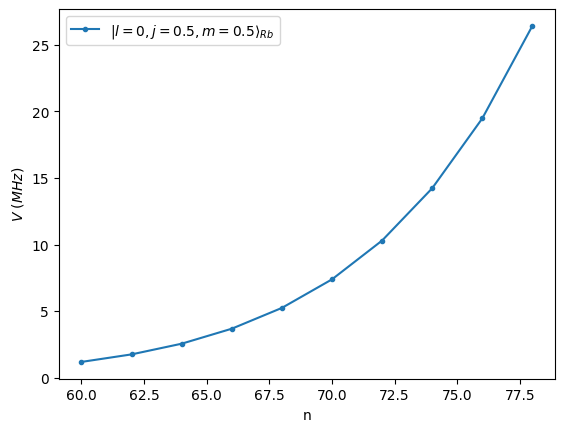

In [67]:
plt.figure()
# plt.plot(ns,V_Cs, label = r'$|l=0, j=0.5, m=0.5 \rangle_{Cs} $', marker = '.')
plt.plot(ns,V_Rb, label = r'$|l=0, j=0.5, m=0.5 \rangle_{Rb} $', marker = '.')
plt.legend()
plt.ylabel('$V$ $(MHz)$')
plt.xlabel('n')
plt.show()

Define `BasisAtom` which is basis of atom being considered
`KetAtom` is a particular state
`SystemAtom` describes a physical system 

In [8]:

basis = pi.BasisAtom(
    "Rb", 
    n=(58, 63), l = (0,3))

ket = pi.KetAtom("Rb", 60, l=0, j=0.5, m=0.5)

system = pi.SystemAtom(basis)

pair_energy = 2* system.get_corresponding_energy(ket, unit='GHz')

pair_basis = pi.BasisPair(
    [system,system],
    energy=(pair_energy - 3, pair_energy + 3),
    energy_unit="GHz"
    )

pair_system = pi.SystemPair(pair_basis).set_distance_vector([0, 0, 7], unit="micrometer")

pair_system.diagonalize()
eigenenergies = pair_system.get_eigenenergies(unit='GHz')
# pi.diagonalize(
#     pair_system,
#     diagonalizer="lapacke_evr",
#     float_type="float64",
#     energy_range=(pair_energy, pair_energy + 0.5),
#     energy_range_unit="GHz",
#     )
# eigenenergy = pair_system[0].get_corresponding_energy(ket, unit="GHz")
    
print(f"{eigenenergies[0] - pair_energy:.5f}")
H = pair_system.get_hamiltonian()
print(H)


-2.17342
<Compressed Sparse Row sparse matrix of dtype 'complex128'
	with 140 stored elements and shape (140, 140)>
  Coords	Values
  (0, 0)	(0.3067049563685533+0j)
  (1, 1)	(0.3067049564142343+0j)
  (2, 2)	(0.3067049565031196+0j)
  (3, 3)	(0.3067049565031196+0j)
  (4, 4)	(0.30670495651463425+0j)
  (5, 5)	(0.30670495651463425+0j)
  (6, 6)	(0.3067049565482998+0j)
  (7, 7)	(0.3067049565482998+0j)
  (8, 8)	(0.3067049991614888+0j)
  (9, 9)	(0.3067049991988905+0j)
  (10, 10)	(0.30670499928809475+0j)
  (11, 11)	(0.30670499928809475+0j)
  (12, 12)	(0.306704999316669+0j)
  (13, 13)	(0.306704999316669+0j)
  (14, 14)	(0.30670499967070924+0j)
  (15, 15)	(0.3067049996735509+0j)
  (16, 16)	(0.30670502657337334+0j)
  (17, 17)	(0.30670502657337334+0j)
  (18, 18)	(0.30670502657337334+0j)
  (19, 19)	(0.30670502657337334+0j)
  (20, 20)	(0.30670502657337334+0j)
  (21, 21)	(0.30670502657337334+0j)
  (22, 22)	(0.30670502657337334+0j)
  (23, 23)	(0.30670502657337334+0j)
  (24, 24)	(0.30670502659747295+0j)
 

In [7]:
n_Rb = 68
n_Cs = 67


Rb_68 = pi.KetAtom("Rb", n=68, l=0, j=0.5, m=0.5)
Rb_67 = pi.KetAtom("Rb", n=67, l=1, j=0.5, m=0.5)

Cs_s = pi.KetAtom("Cs", n=67, l=0, j=0.5, m=0.5)
Cs_p = pi.KetAtom("Cs", n=67, l=1, j=1.5, m=0.5)

energy_1 = Rb_68.get_energy("1/cm")
energy_2 = Cs_s.get_energy("1/cm")

basis1 = pi.BasisAtom(
    "Rb",
    n=(Rb_67.n, Rb_68.n)
)

basis2 = pi.BasisAtom(
    "Cs",
    l=(Cs_s.l, Cs_p.l)
)

The single-channel quantum defect theory can be inaccurate for effective principal quantum numbers < 25. This can lead to inaccurate matrix elements.


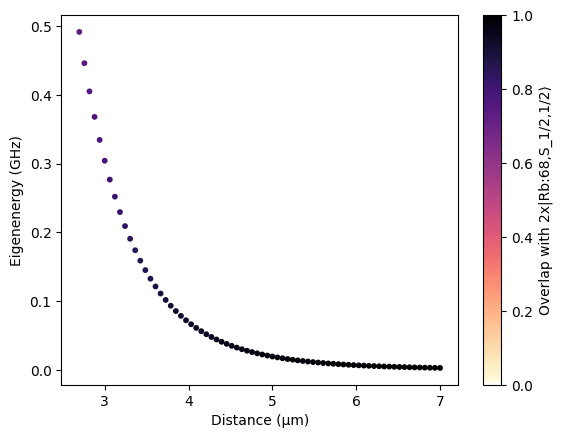

In [ ]:
system = pi.SystemAtom(basis1)
system.diagonalize()
energy_shifted = system.get_corresponding_energy(Rb_68, unit="GHz")
distances = np.linspace(1,7,100)
pair_energy = 2 * energy_shifted

pair_basis = pi.BasisPair(
    [system,system],
    energy=(pair_energy - .8, pair_energy + .8),
    energy_unit="GHz",
    m=(2 * Rb_68.m, 2 * Rb_68.m),
)


pair_systems = [
    pi.SystemPair(pair_basis).set_distance_vector([0, 0, d], unit="micrometer")
    for d in distances
]
pi.diagonalize(
    pair_systems,
    diagonalizer="lapacke_evr",
    float_type="float64",
    energy_range=(pair_energy, pair_energy + 0.5),
    energy_range_unit="GHz",
)

pair_eigenenergies = [s.get_eigenenergies(unit="GHz") for s in pair_systems]
pair_overlaps = [s.get_eigenbasis().get_overlaps([Rb_68,Rb_68]) for s in pair_systems]

distances_repeated = np.hstack(
    [d * np.ones_like(e) for d, e in zip(distances, pair_eigenenergies)]
)
pair_eigenenergies_flattened = np.hstack(pair_eigenenergies)
pair_overlaps_flattened = np.hstack(pair_overlaps)
sorter = np.argsort(pair_eigenenergies_flattened)

scat = plt.scatter(
    distances_repeated[sorter],
    pair_eigenenergies_flattened[sorter] - pair_energy,
    c=pair_overlaps_flattened[sorter],
    s=10,
    cmap=alphamagma,
    vmin=0,
    vmax=1,
)
plt.colorbar(scat, label=f"Overlap with 2x{Rb_68}")
plt.xlabel("Distance (μm)")
plt.ylabel("Eigenenergy (GHz)")
plt.show()